# Effect of Data Features on Borrower's APR/ Interest Rate and the Loan Amount
### Dataset:  Loan Data From Prosper
### By: Abdulqadir Saieb

## Investigation Overview

In this investigation, I examined and analyzed the effects of the Prosper Loan Dataset main features on determining and influencing the Borrower's annual percentage raten (APR), the Borrower's Rate known as the interest rate (i) and the Loan Amount. 

## Dataset Overview

The dataset **Loan** dataset from the Peer-Peer Lending marketplace in United States called **Prosper**. The Dataset contains 113,917 loans data under 81 variables and include information regarding borrowers's financial background, the loan amount, length of the loan, current status of each loan, borrower's annual percentage rate (APR), borrower's interest rate (i), the lender yield on the loan, estimated returns and estimated loss, Prosper rating, credit history, credit score and credit line,  borrower income, and plenty more.

**Table of Contents:**
- [Introduction](#intro)
- [Preliminary Wrangling](#wrang)
- [Eexploratory Data Analysis](#eda)

<a id="intro"></a>
## Introduction

The purpose of this project is to explore, analyze and explain or communicate the **Loan** dataset from the Peer-Peer Lending marketplace in United States called **Prosper**. The Dataset contains 113,917 loans data under 81 variables and include information regarding borrowers, the loan amount, length of the loan, the current status of each loan, the borrower's annual percentage rate (APR) for the loan, the borrower's interest rate for this loan, the lender yield on the loan, estimated returns and estimated loss, Prosper rating, credit history, credit score and credit line,  borrower income, and plenty more.  

This project is divided into two major parts. In the first part, I'll conduct an exploratory data analysis (EDA) on the dataset. I'll use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part should be structured, going from simple univariate relationships up through multivariate relationships. In this part of the project I'll ask questions about the data and make discoveries.

In the second part, I'll take the main findings from the exploration and convey them to others through explanatory data analysis. To this end, I'll create a slide deck that leverages polished, explanatory visualizations to communicate the results. This part of the project makes heavy use of the first part of the project. I'll select one or two major paths in my exploration, choose relevant visualizations along that path, and then polish them to construct a story for my readers to understand what I found.

**In this project  in the Jupyter Notebooks Editor, I w'll mostly use the following Python libraries.**

    NumPy
    pandas
    Matplotlib
    Seaborn
I'll be analyzing and asking questions about the data such as the following:
- What factors affect a loan’s outcome status?
- What characteristics affects the borrower’s APR and the interest rate?
- What features influence the loan amount?

<a id='wrang'></a>
### Preliminary Wrangling
In this section, I'll load the dataset and describe the aspects and properties of the dataset through the questions that motivate my exploration goals.

In [1]:
#import python libraries and packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import datetime as datetime

#set plots to be embided inline
%matplotlib inline

#set plot style and somem properties
plt.style.use('seaborn-bright')
sn.set(style='darkgrid', color_codes=True)

In [2]:
#set printing options to display all column headers and rows in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# load in the dataset into a pandas dataframe and view sample data
df_loan = pd.read_csv('project_data/prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#view the number of columns and rows in the dataset
df_loan.shape

(113937, 81)

In [5]:
#check for duplicate values in the dataset
df_loan.duplicated().sum()

0

#### What is the structure of the dataset?
There are total 113,937 loan observations or records with 81 attributes in the **Prosper Loan** Dataset.

#### What is/are the main feature(s) of interest in the dataset?
The term of loan, Prosper rating, borrowers' income, employment status, occupation, home ownership, available credits, number of delinquencies and similar features will be analyzed to see what factors in the dataset influence the Loan amount,	borrower's annual percentage rate (APR) and the interest rate (i). The same features will be explored and explained in terms of values distribution, common trends, relationship and comparison to one another.

#### What features in the dataset do I think will help support my investigation into the feature(s) of interest?
The income, Prosper rating,  credit score, employment status and occupation could be the factors that influence loan, APR and the interst rate, since higher rating, higher income, higher credit score and employment determine how likely is an individual trustworthy.

In [6]:
#to abridged the dataset for our purpose, I'll make a copy of the dataframe and will clean it as required
df_loan_copy = df_loan.copy()

In [7]:
#new dataframe from the dataset by choosign only variables of our interest
columns = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 
           'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
           'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'IncomeRange', 'LoanOriginationDate', 'LoanOriginalAmount']

df_loan_clean = df_loan_copy[columns]

In [8]:
#check the new dataset columns
df_loan_clean.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'DelinquenciesLast7Years',
       'AvailableBankcardCredit', 'IncomeRange', 'LoanOriginationDate',
       'LoanOriginalAmount'],
      dtype='object')

In [9]:
#check the structure of the new df
df_loan_clean.shape

(113937, 16)

In [10]:
#display a few first rows of the new dataframe
df_loan_clean.head()

,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DelinquenciesLast7Years,AvailableBankcardCredit,IncomeRange,LoanOriginationDate,LoanOriginalAmount
0,36,0.16516,0.1580,NaN,NaN,NaN,Other,Self-employed,True,640.0,659.0,4.0,1500.0,"$25,000-49,999",2007-09-12 00:00:00,9425
1,36,0.12016,0.0920,6.0,A,7.0,Professional,Employed,False,680.0,699.0,0.0,10266.0,"$50,000-74,999",2014-03-03 00:00:00,10000
2,36,0.28269,0.2750,NaN,NaN,NaN,Other,Not available,False,480.0,499.0,0.0,NaN,Not displayed,2007-01-17 00:00:00,3001
3,36,0.12528,0.0974,6.0,A,9.0,Skilled Labor,Employed,True,800.0,819.0,14.0,30754.0,"$25,000-49,999",2012-11-01 00:00:00,10000
4,36,0.24614,0.2085,3.0,D,4.0,Executive,Employed,True,680.0,699.0,0.0,695.0,"$100,000+",2013-09-20 00:00:00,15000


In [11]:
#check which data variables have missing values 
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [12]:
#view the columns data types
df_loan_clean.dtypes

Term                         int64
BorrowerAPR                float64
BorrowerRate               float64
ProsperRating (numeric)    float64
ProsperRating (Alpha)       object
ProsperScore               float64
Occupation                  object
EmploymentStatus            object
IsBorrowerHomeowner           bool
CreditScoreRangeLower      float64
CreditScoreRangeUpper      float64
DelinquenciesLast7Years    float64
AvailableBankcardCredit    float64
IncomeRange                 object
LoanOriginationDate         object
LoanOriginalAmount           int64
dtype: object

#### Data Quality Issues:
- Erroneous Data Types
- Missing Data values
- Erroneous data values
- Non-numeric charactors in numeric column values

#### Tidiness Issues:
- Income range (lower and upper) variables are single column (IncomeRange)

In [13]:
#convert LoanOriginationDate datype to datetime
df_loan_clean['LoanOriginationDate'] = pd.to_datetime(df_loan_clean['LoanOriginationDate'])

C:\Users\send2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#remove data records before July 2009
df_loan_clean = df_loan_clean[df_loan_clean['LoanOriginationDate'].dt.date > datetime.date(2009,8,1)]

In [15]:
#remove comma, the dollar sign, hypen and the plus sign from the income range column values
df_loan_clean['IncomeRange'] = df_loan_clean['IncomeRange'].str.replace(',', '')
df_loan_clean['IncomeRange'] = df_loan_clean['IncomeRange'].str.replace('$', '')
df_loan_clean['IncomeRange'] = df_loan_clean['IncomeRange'].str.replace('-', ' ')
df_loan_clean['IncomeRange'] = df_loan_clean['IncomeRange'].str.replace('+', '')

In [16]:
#split the income range column into two columns 
df_loan_clean['IncomeRangeLower'], df_loan_clean['IncomeRangeUpper'] = df_loan_clean['IncomeRange'].str.split(' ', 1).str

In [17]:
#drop the income range column
df_loan_clean= df_loan_clean.drop(['IncomeRange'], axis=1)

In [18]:
#extract erroneous non-numeric values from the income range columns
df_loan_clean['IncomeRangeLower'] = df_loan_clean['IncomeRangeLower'].str.extract('(\d+)', expand=False)
df_loan_clean['IncomeRangeUpper'] = df_loan_clean['IncomeRangeUpper'].str.extract('(\d+)', expand=False)

In [19]:
df_loan_clean['IncomeRangeUpper'] = df_loan_clean['IncomeRangeUpper'].fillna(100000)

In [20]:
#check if there are still null values in the dataset
df_loan_clean.isnull().sum()

Term                          0
BorrowerAPR                   0
BorrowerRate                  0
ProsperRating (numeric)     127
ProsperRating (Alpha)       127
ProsperScore                127
Occupation                 1333
EmploymentStatus              0
IsBorrowerHomeowner           0
CreditScoreRangeLower         0
CreditScoreRangeUpper         0
DelinquenciesLast7Years       0
AvailableBankcardCredit       0
LoanOriginationDate           0
LoanOriginalAmount            0
IncomeRangeLower            649
IncomeRangeUpper              0
dtype: int64

In [21]:
# drop null records from the dataset
df_loan_clean = df_loan_clean.dropna()

In [22]:
#check the dataset structure now
df_loan_clean.shape

(82855, 17)

In [23]:
#since many of the data columns don't need floating points, thus change the data type from float to int
df_loan_clean[['ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeLower',
               'CreditScoreRangeUpper', 'DelinquenciesLast7Years', 'IncomeRangeLower', 
               'IncomeRangeUpper']] = df_loan_clean[['ProsperRating (numeric)',
               'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
               'DelinquenciesLast7Years', 'IncomeRangeLower', 'IncomeRangeUpper']].astype(int)

In [24]:
#print prosper rating values
print(df_loan_clean['ProsperRating (Alpha)'].unique());

['A' 'D' 'B' 'E' 'C' 'AA' 'HR']


In [25]:
# convert Prosper Score (Alpha) into ordered categorical types
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

df_loan_clean['ProsperRating (Alpha)'] = df_loan_clean['ProsperRating (Alpha)'].astype(cat_type)

In [26]:
#check the results
print(df_loan_clean['ProsperRating (Alpha)'].unique())

[A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]


In [27]:
#convert the income range columns from object type to int
df_loan_clean[['IncomeRangeLower', 'IncomeRangeUpper']] = df_loan_clean[['IncomeRangeLower', 'IncomeRangeUpper']].astype(int)

In [28]:
#check the data types now
df_loan_clean.dtypes

Term                                int64
BorrowerAPR                       float64
BorrowerRate                      float64
ProsperRating (numeric)             int32
ProsperRating (Alpha)            category
ProsperScore                        int32
Occupation                         object
EmploymentStatus                   object
IsBorrowerHomeowner                  bool
CreditScoreRangeLower               int32
CreditScoreRangeUpper               int32
DelinquenciesLast7Years             int32
AvailableBankcardCredit           float64
LoanOriginationDate        datetime64[ns]
LoanOriginalAmount                  int64
IncomeRangeLower                    int32
IncomeRangeUpper                    int32
dtype: object

In [29]:
#discriptive statistics for numeric variables
df_loan_clean.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DelinquenciesLast7Years,AvailableBankcardCredit,LoanOriginalAmount,IncomeRangeLower,IncomeRangeUpper
count,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000,82855.000000
mean,42.542031,0.226310,0.195752,4.082385,5.969622,699.615473,718.615473,3.649617,11436.821894,9134.976441,53708.640287,74172.739786
std,11.673798,0.079938,0.074646,1.672059,2.377956,47.204640,47.204640,9.336578,18626.047856,6307.532746,29395.106906,23085.783219
min,12.000000,0.045830,0.040000,1.000000,1.000000,600.000000,619.000000,0.000000,0.000000,1000.000000,0.000000,24999.000000
25%,36.000000,0.163240,0.135500,3.000000,4.000000,660.000000,679.000000,0.000000,1154.000000,4000.000000,25000.000000,49999.000000
50%,36.000000,0.219350,0.187500,4.000000,6.000000,700.000000,719.000000,0.000000,4606.000000,7500.000000,50000.000000,74999.000000
75%,60.000000,0.291345,0.257300,5.000000,8.000000,720.000000,739.000000,2.000000,13988.000000,14000.000000,75000.000000,99999.000000
max,60.000000,0.423950,0.360000,7.000000,11.000000,880.000000,899.000000,99.000000,498374.000000,35000.000000,100000.000000,100000.000000


<a id='eda'></a>
## Exploratory Data Analysis
In this part, I'm going to explore the data and document my findings and briefly introduce the dataset, then I'll systematically walk you through the points of exploration that I've conducted. I'll make sure that I adhere to principles of using appropriate plot types and encodings so that accurate conclusions can be drawn.

### Univariate Exploration
In this section, I'll investigate distributions of individual variables such as borrower's APR, borrower's Rate, Prosper rating, borrower's occupation, loan term, credit score, loan amount and etc.

## Distributions Borrower's Rate or the Interest Rate
The distribution of borrower's rate is almost normally distributed concenterated around 15% with a littele skewness to the right, a small peak at about 26% and an outlier on 32%.

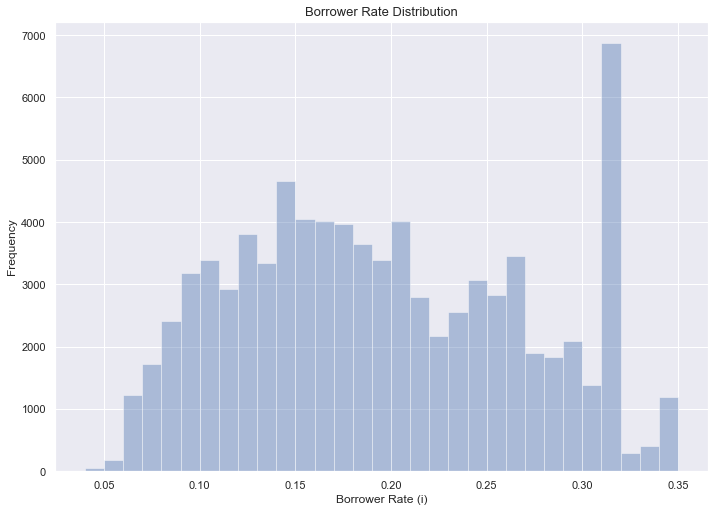

In [30]:
#borrowers' APR frequncy distribution
plt.figure(figsize=(11.69, 8.27))
plt.fontsize = 12
bin_edges = np.arange(0.04, df_loan_clean['BorrowerRate'].max(), 0.01)
sn.distplot(df_loan_clean['BorrowerRate'], kde=False, bins=bin_edges)
plt.title('Borrower Rate Distribution', fontsize=13)
plt.xlabel('Borrower Rate (i)')
plt.ylabel('Frequency');

The distribution of borrower's rate is almost normally distributed concenterated around 15% with a littele skewness to the right, a small peak at about 26% and an outlier on 32%.

## Distribution of Borrowers' Annual Percentage Rate (APR)
The borower APR is a multimodale distribution. The distribution is centered on 20% like normal but then there is a small peak at 9%, a exceptionally hight peak at 13-16% with uniform distribution and another high peak at 29% and high count between 35% and 36%. There are very few APR greater than or equal to 42%.

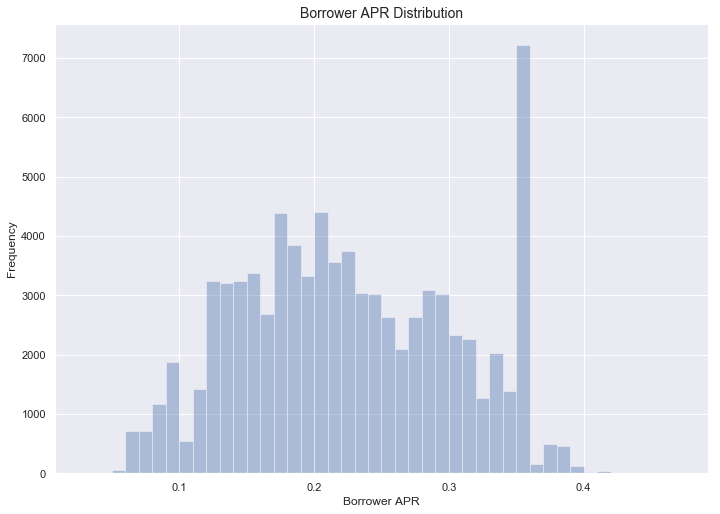

In [31]:
#borrowers' APR frequncy distribution
plt.figure(figsize=(11.69, 8.27))
plt.fontsize = 12
bins = np.arange(0.03, df_loan_clean['BorrowerAPR'].max()+0.05, 0.01)
sn.distplot(df_loan_clean['BorrowerAPR'], bins= bins, kde=False)
plt.title('Borrower APR Distribution', fontsize=14)
plt.xlabel('Borrower APR')
plt.ylabel('Frequency');

## Distribution of Laon Term
Most of the borrowers, about 52000, were given loans by Prosper on 36 months term (3 years) and the least loan term was 12 months (1 year) which was given to less than 1500 borrowers.

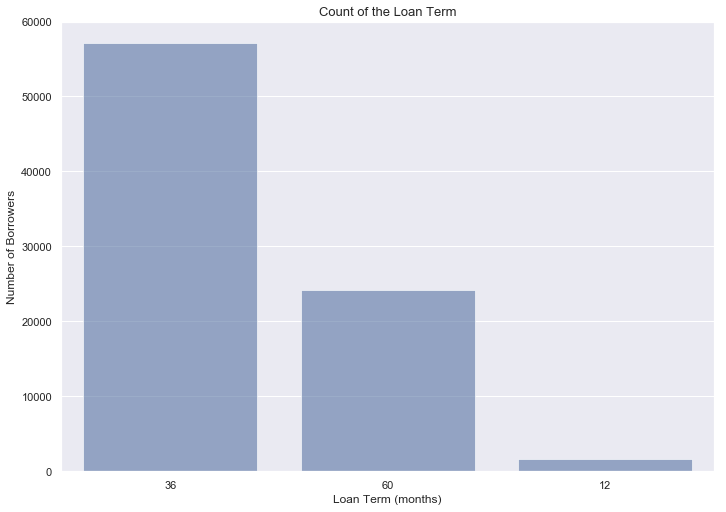

In [32]:
#ploting the distribution of loan terms
plt.figure(figsize=(11.69, 8.27))
sn.countplot(data = df_loan_clean, x = 'Term',  color= sn.color_palette()[0], 
             order = df_loan_clean['Term'].value_counts().index, alpha=0.6)
plt.title('Count of the Loan Term', fontsize= 13)
plt.xlabel('Loan Term (months)')
plt.ylabel('Number of Borrowers');

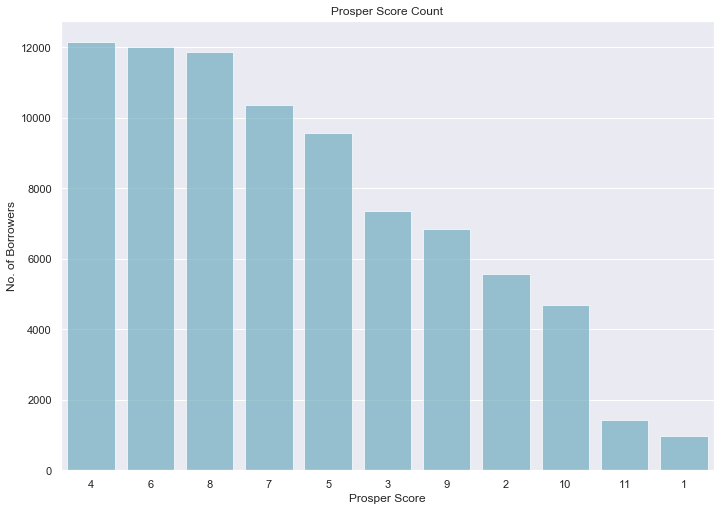

In [33]:
# what prosper score counts the most?
plt.figure(figsize=(11.69, 8.27))
sn.countplot(data = df_loan_clean, x = 'ProsperScore',  color=sn.color_palette()[9],
             order = df_loan_clean['ProsperScore'].value_counts().index, alpha=0.7);
plt.title('Prosper Score Count')
plt.xlabel('Prosper Score')
plt.ylabel('No. of Borrowers');

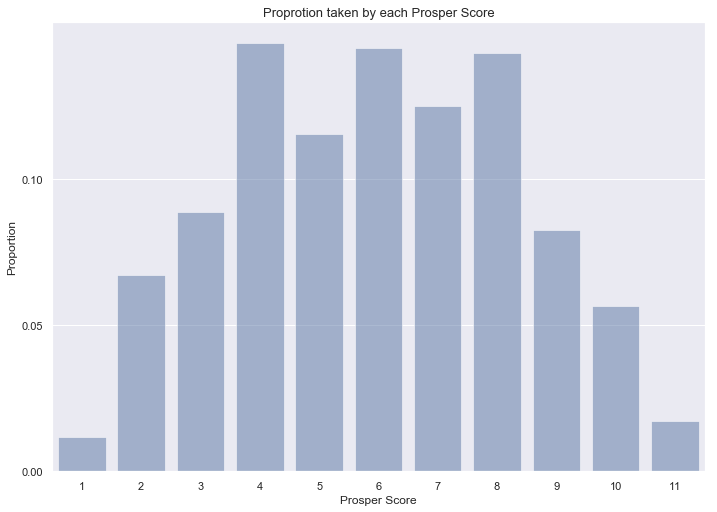

In [34]:
# proportion taken by each prosper score value
plt.figure(figsize=(11.69, 8.27))
n_scores = df_loan_clean.shape[0]
max_count = df_loan_clean['ProsperScore'].value_counts().max()
max_prop = max_count / n_scores

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sn.countplot(data = df_loan_clean, x = 'ProsperScore', color = sn.color_palette()[0], alpha=0.5)
plt.yticks(tick_props * n_scores, tick_names)
plt.title('Proprotion taken by each Prosper Score', fontsize= 13)
plt.xlabel('Prosper Score')
plt.ylabel('Proportion');

It looks like most of the borrowers were granted with low score by Prosper. Both of the bar charts above show that most of the borrowers (about 67%) received between 4 and 8. Less than 17% of the borrowers got high scores of 9, 10, and 11 combined and around 16% got score number less than 4.

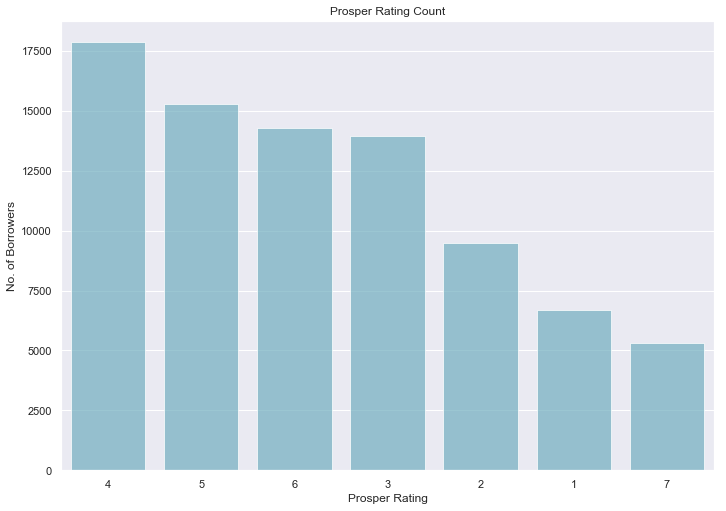

In [35]:
#prosper rating count plot
plt.figure(figsize=(11.69, 8.27))
sn.countplot(data = df_loan_clean, x = 'ProsperRating (numeric)',  color=sn.color_palette()[9],
             order = df_loan_clean['ProsperRating (numeric)'].value_counts().index, alpha= 0.7);
plt.title('Prosper Rating Count')
plt.xlabel('Prosper Rating')
plt.ylabel('No. of Borrowers');

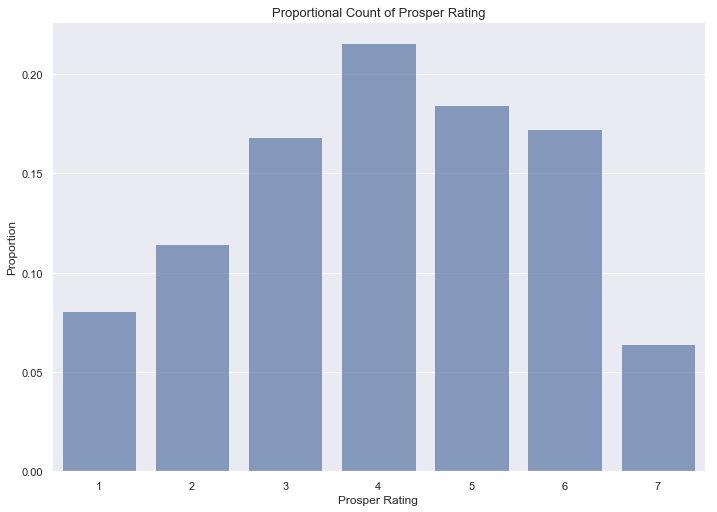

In [36]:
# proportion taken by each prosper rating value
plt.figure(figsize=(11.69, 8.27))
n_rating = df_loan_clean.shape[0]
max_rating = df_loan_clean['ProsperRating (numeric)'].value_counts().max()
max_rating_prop = max_rating / n_rating

# generate tick mark locations and names
tick_props = np.arange(0, max_rating_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sn.countplot(data = df_loan_clean, x = 'ProsperRating (numeric)', color = sn.color_palette()[0], alpha=0.7)
plt.yticks(tick_props * n_rating, tick_names)
plt.title('Proportional Count of Prosper Rating', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Proportion');

The Prosper rating (numeric) is distributed almost normally. Most of the borrowers are given median score of 4, i.e. almost 22% customers/borrowers got the rating score of 4 but only less than 7% were rated with a hight rating score of 7. 

In [37]:
#top 10 occupation count
occupations = df_loan_clean['Occupation'].value_counts()
occupations = occupations[:9]

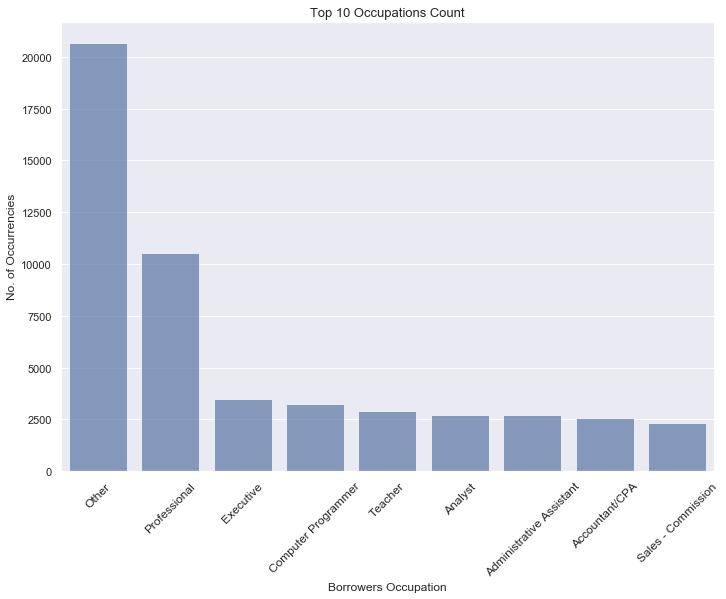

In [38]:
# ploting top 10 borrower occupations
plt.figure(figsize=(11.69, 8.27))
sn.barplot(occupations.index, occupations.values, color = sn.color_palette()[0],
           alpha=0.7)
plt.title('Top 10 Occupations Count', fontsize=13)
plt.xlabel('Borrowers Occupation')
plt.ylabel('No. of Occurrencies')
plt.xticks(rotation= 45, fontsize=12);

Most of the borrowers' occupations are unstated, i.e. the customers declared their occupation under other or professional. It looks like they were unwilling to share their occupation information.

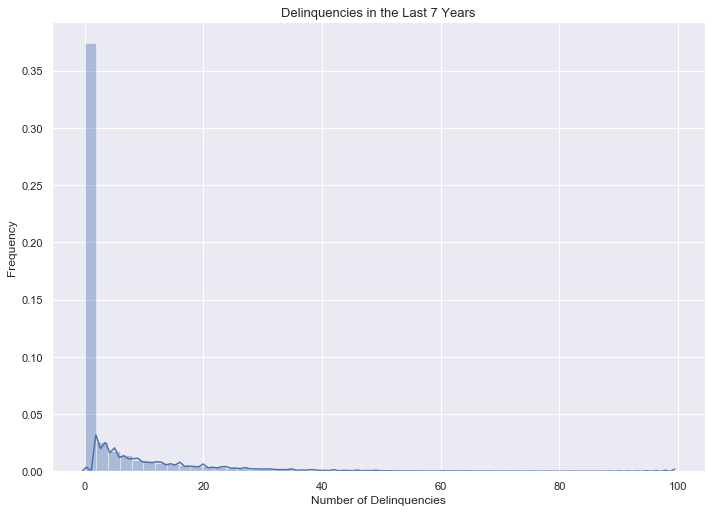

In [39]:
# distplot for the percentage of distribution of delinquencies in the last 7 years
plt.figure(figsize=[11.69, 8.27])
bins = np.arange(0, df_loan_clean['DelinquenciesLast7Years'].max(), 1)
sn.distplot(df_loan_clean['DelinquenciesLast7Years'])
plt.title('Delinquencies in the Last 7 Years', fontsize=13)
plt.xlabel('Number of Delinquencies')
plt.ylabel('Frequency');

It seems that most of the borrowers are with zero delinquencies in the last 7 years. There are about 3% of borrowers with only 1 delinquency and when the number of delinquencies reach 20 and above, there are very few occurrences with that number of delinquencies.

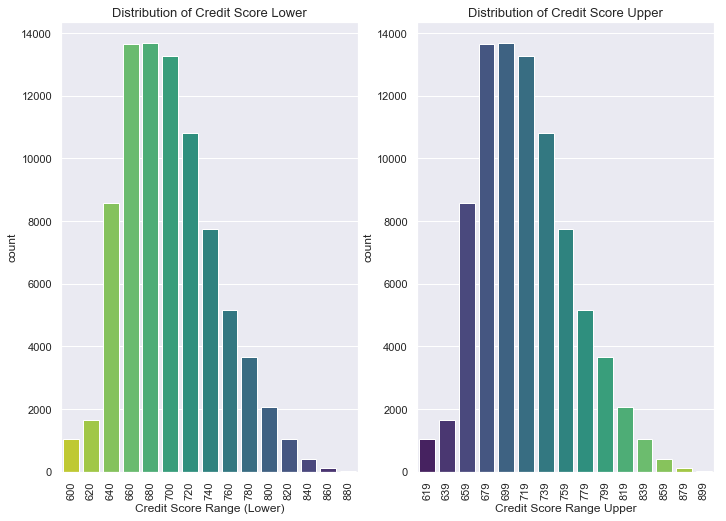

In [40]:
#ploting credit score range values distribution by value counts
plt.figure(figsize=(11.69, 8.27))

plt.subplot(121)
ax = sn.countplot(df_loan_clean['CreditScoreRangeLower'], palette='viridis_r')
plt.title('Distribution of Credit Score Lower', fontsize=13)
plt.xlabel('Credit Score Range (Lower)')
plt.xticks(rotation= 90);

plt.subplot(122)
ax = sn.countplot(df_loan_clean['CreditScoreRangeUpper'], palette='viridis')
plt.title('Distribution of Credit Score Upper', fontsize=13)
plt.xlabel('Credit Score Range Upper')
plt.xticks(rotation= 90);

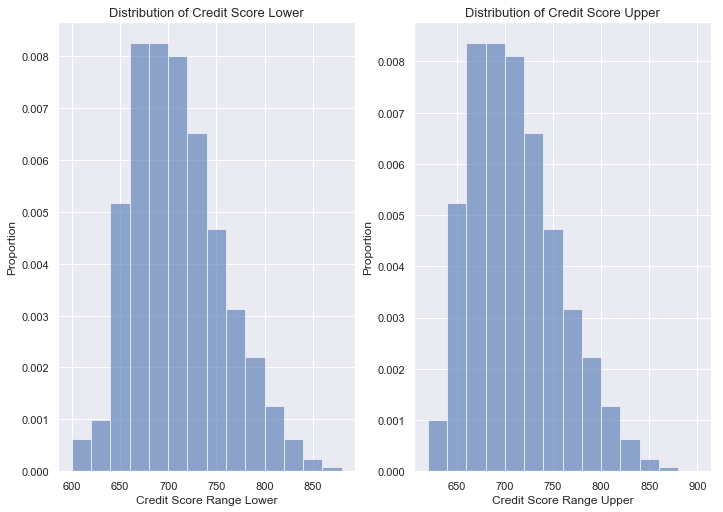

In [41]:
#ploting credit score range values distribution by proportion of unique value to each other
plt.figure(figsize=[11.69, 8.27])

plt.subplot(121)
bins = np.arange(600, df_loan_clean['CreditScoreRangeLower'].max()+20, 20)
plt.hist(df_loan_clean['CreditScoreRangeLower'], bins= bins, density=True, alpha=0.6);
plt.title('Distribution of Credit Score Lower', fontsize=13)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Proportion');

plt.subplot(122)
bins = np.arange(620, df_loan_clean['CreditScoreRangeUpper'].max()+20, 20)
plt.hist(df_loan_clean['CreditScoreRangeUpper'], bins= bins, density=True, alpha=0.6);
plt.title('Distribution of Credit Score Upper', fontsize=13)
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Proportion');

Both of the credit score ranges lower and upper are a right skewed and visuals for both are showing identical distributions trends. Most of the borrowers credit score lower lye between 640 and 740.  less than 2500 are between 600 and 620 and credit scores 820 - 880 are less than 2000 which is not significant. Most of the credit score upper data lye between 659 and 759 score ranges. The score range below 640 is less than 5% of the data and credit score range 859 and above is vary rare and is less than 1% of the data. 

These trends indicate that most of Prosper's customers have average credit scores and people with higher credit scores are not interested or not in need to borrow from Prosper and people with very low credit scores are rarely excepted to get loan from prosper.

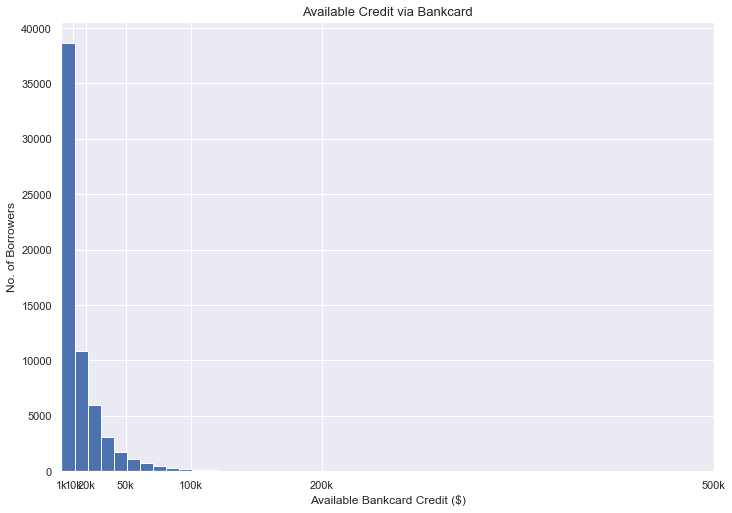

In [42]:
#distribution plot for the value distribution of the total available credit via bank card
binsize = 10000
bins = np.arange(1000, df_loan_clean['AvailableBankcardCredit'].max()+500, binsize)
plt.figure(figsize=[11.69, 8.27])
plt.hist(data = df_loan_clean, x = 'AvailableBankcardCredit', bins = bins)
plt.margins(x=0) 
plt.xticks([1e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5], ['1k', '10k', '20k', '50k', '100k', '200k', '500k'])
plt.title('Available Credit via Bankcard', fontsize=13)
plt.xlabel('Available Bankcard Credit ($)')
plt.ylabel('No. of Borrowers');

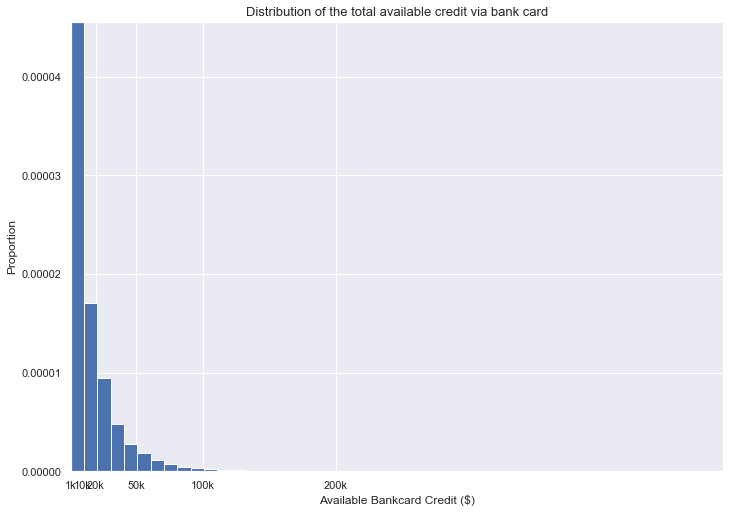

In [43]:
#proportional distribution of available credit via bank card
plt.figure(figsize=[11.69, 8.27])
bins = np.arange(1000, df_loan_clean['AvailableBankcardCredit'].max(), 10000)
plt.hist(df_loan_clean['AvailableBankcardCredit'], bins= bins, density=True);
plt.xticks([1e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5], ['1k', '10k', '20k', '50k', '100k', '200k', '500k'])
plt.margins(x=0, y=-0.25) 
plt.title('Distribution of the total available credit via bank card', fontsize= 13)
plt.xlabel('Available Bankcard Credit ($)')
plt.ylabel('Proportion');

Most counts of credit available via bank card fall in values from 0 to 100,000. Majority of the borrowers who have credit available via bank cards have less than 14,000.

## Distribution of Income

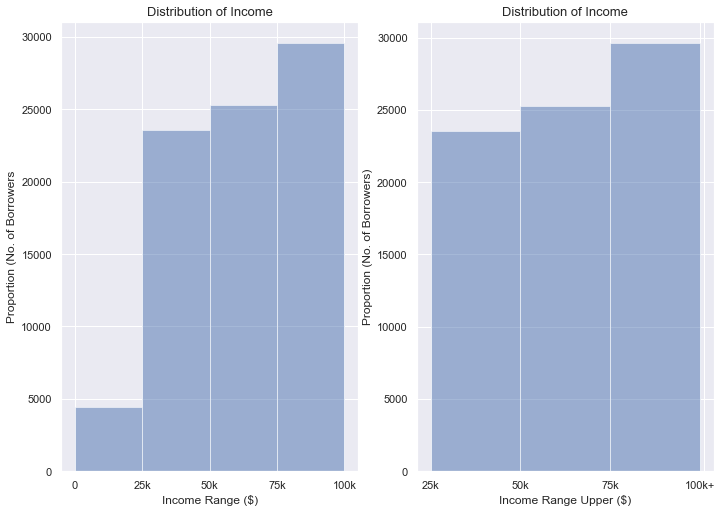

In [44]:
#ploting the credit score ranges
plt.figure(figsize=[11.69, 8.27])

plt.subplot(121)
binsize = 25000
bins = np.arange(0, df_loan_clean['IncomeRangeLower'].max()+5000, binsize)
plt.hist(df_loan_clean['IncomeRangeLower'], bins=bins, color= sn.color_palette()[0], alpha= 0.5)
plt.xticks([0, 25000, 50000, 75000, 100000 ], [0,'25k','50k','75k','100k'])
plt.title('Distribution of Income', fontsize=13)
plt.xlabel('Income Range ($)')
plt.ylabel('Proportion (No. of Borrowers');

plt.subplot(122)
binsize = 25000
bins = np.arange(25000, df_loan_clean['IncomeRangeUpper'].max()+5000, binsize)
plt.hist(df_loan_clean['IncomeRangeUpper'], bins=bins, color= sn.color_palette()[0], alpha= 0.5)
plt.xticks([24999, 49999, 74999, 99999, 101000], ['25k','50k','75k','100k+'])
plt.title('Distribution of Income', fontsize=13)
plt.xlabel('Income Range Upper ($)')
plt.ylabel('Proportion (No. of Borrowers)');

The borrowers' income range is left skewed, it could be either the borrowers have stated their income as high or Prosper mostly granted their loans to high income customers. 

## Distribution of Loan Amount
Loan amount distribution is right skewed and most of the borrowers were provided with loan amount between 4000 and 15000 dollars. Obviously, the borrower or an individual will request for amount they needed (for which there is no data in the dataset) but it may also mean Prosper did not wanted to take risk by granting greater amounts to their customers. 

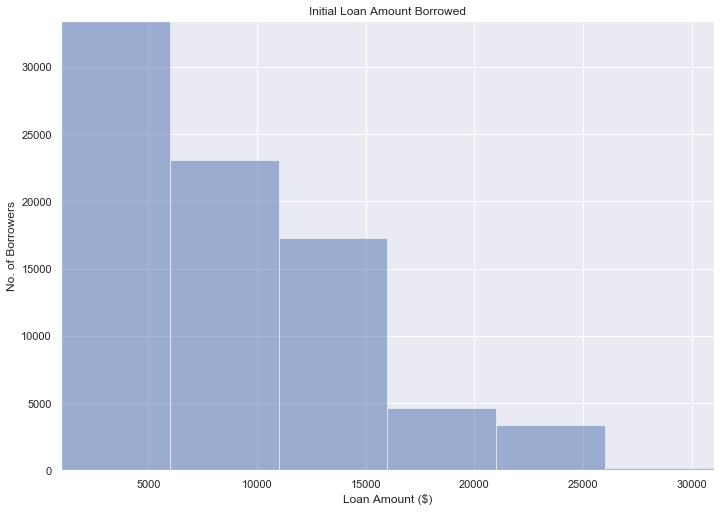

In [45]:
#ploting borrowers' loan amount
plt.figure(figsize=[11.69, 8.27])
bins= np.arange(1000, df_loan_clean['LoanOriginalAmount'].max()+1000, 5000)
plt.hist(data= df_loan_clean, x='LoanOriginalAmount', bins= bins, alpha= 0.5)
plt.margins(x=0, y=-0.01) 
plt.title('Initial Loan Amount Borrowed')
plt.xlabel('Loan Amount ($)')
plt.ylabel('No. of Borrowers');

Loan amount distribution is right skewed and most of the borrowers were provided with loan amount between 4000 and 15000 dollars. Obviously, the borrower or an individual will request for amount they needed (for which there is no data in the dataset) but it may also mean Prosper did not wanted to take risk by granting greater amounts to their customers. 

## Distribution of Data Variables. 
The distribution of most of the variables was not normal and it was either right or left skewed but as expected, nothing seemed extremely unusual. I have performed some data wrangling operations on the data which inclueded changing the data types, omitting missing and irrelevant data values plus removing none numeric characters and deviding the income range variable to two variables of lower and upper ranges.

### Bivariate Exploration

In this section I'll explore and visualize the main individual variables against the APR and/or Rate as well as the Loan Amount to see what's the relationship between them and which variable influence the APR, rate and the loan amount the most or the least.

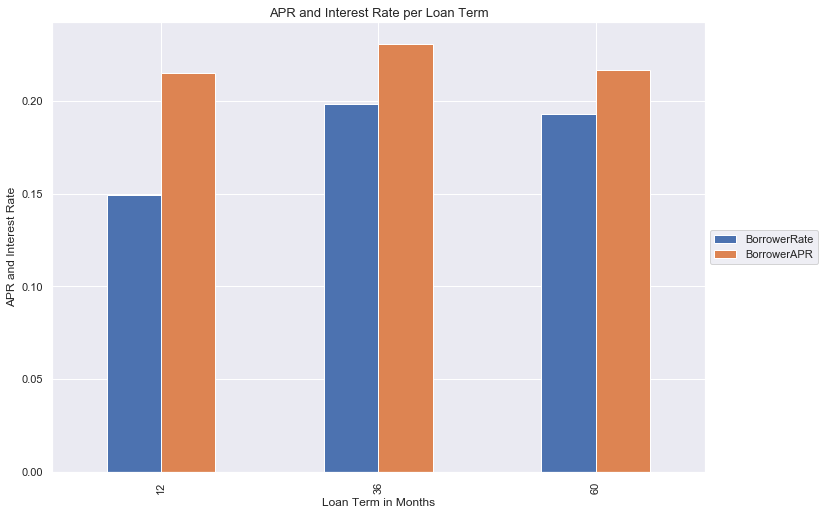

In [46]:
#borrowers APR/Rate vs. loan term
term_rate_apr = df_loan_clean.groupby('Term')[['BorrowerRate', 'BorrowerAPR']].mean()
term_rate_apr.plot(kind='bar', figsize=(11.69, 8.27))
plt.title('APR and Interest Rate per Loan Term', fontsize= 13)
plt.xlabel('Loan Term in Months')
plt.ylabel('APR and Interest Rate')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left');

The borrowers APR for the loan terms 12 and 60 is almost identical but for the 36 months terms, it's a little high. The borrwer rate for 36 and 60 months terms is almost the same with about 1.5% higher for 36 months. The brrower's rate is almost the same for 36 and 60 months terms but it's sufficiently low (about 15%) for 12 months loan term. Since the borrowers with the 12 months term are in small number and sice the APR for all the laon terms is similar, therefore one can say that the loan term doesn't influence the APR and the interest rate significantly.

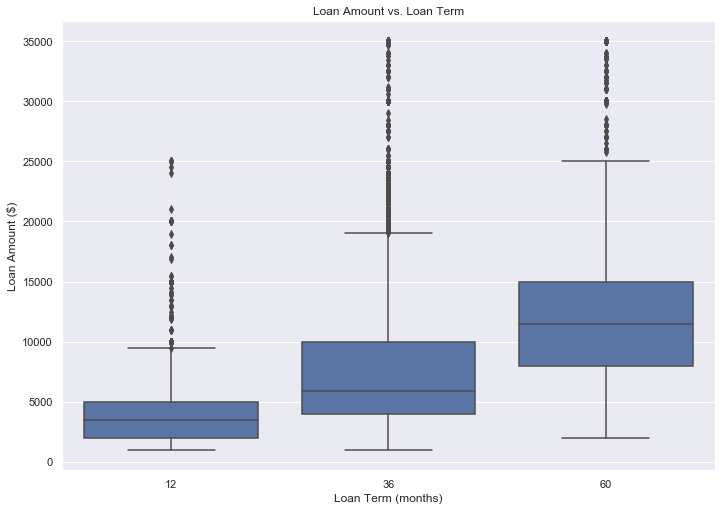

In [47]:
#loan amount vs. loan term
plt.figure(figsize=[11.69, 8.27])
sn.boxplot(data= df_loan_clean, x= 'Term', y= 'LoanOriginalAmount', color= sn.color_palette()[0])
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan Amount ($)');

The box plot above shows that there is positive relationship between the loan amount and the loan term, i.e. the loan amount is higher when the loan term is higher and vice versa.

## Borrower's APR Based on Prosper Rating
Prosper Rating is the most significant factor in determining the borrower's APR. The highest the rating (AA) the lowest the APR (5.61%) a borrower would get and the the lowest the rating (HR), a borrower gets from Prosper, the highest the APR (22.28%) the borrower would recieve.

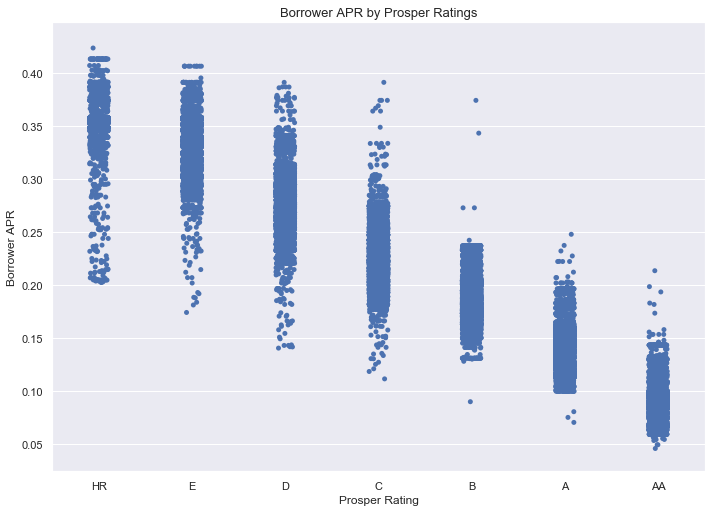

In [48]:
#strip plot for the interest rate based on prosper rating
prosperR_APR = df_loan_clean.groupby('ProsperRating (Alpha)')['BorrowerAPR'].mean()

plt.figure(figsize=(11.69, 8.27))
sn.stripplot( data= df_loan_clean, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR', color=sn.color_palette()[0]) 
plt.title('Borrower APR by Prosper Ratings', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');

Prosper Rating is the most significant factor in determining the borrower's APR. The highest the rating (AA) the lowest the APR (5.61%) a borrower would get and the the lowest the rating (HR), a borrower gets from Prosper, the highest the APR (22.28%) the borrower would recieve.

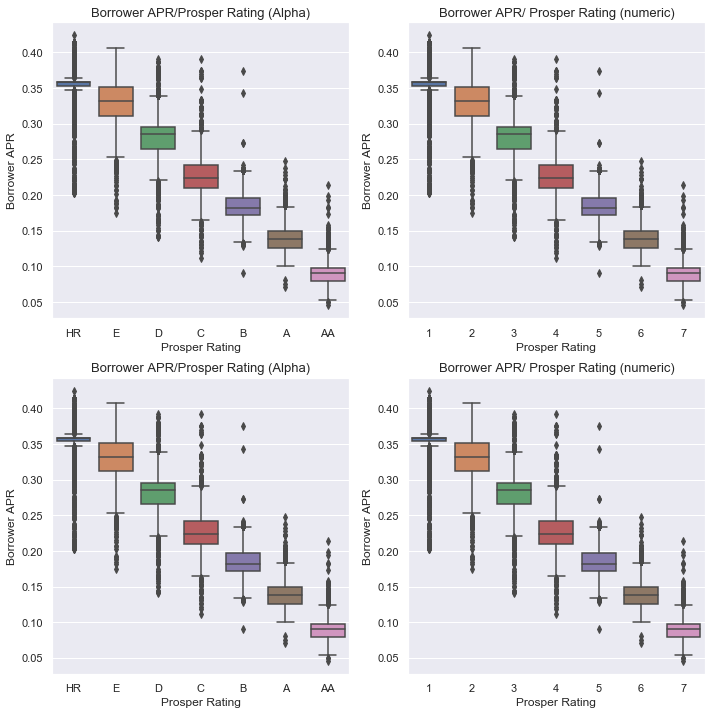

In [49]:
#box plots for the borrower APR and borrower rate and Prosper score both alpha and numeric 
plt.figure(figsize = (11.69, 12)) 

plt.subplot(221)
sn.boxplot(data = df_loan_clean, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR')
plt.title('Borrower APR/Prosper Rating (Alpha)', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')

plt.subplot(222)
sn.boxplot(data = df_loan_clean, x = 'ProsperRating (numeric)', y = 'BorrowerAPR')
plt.title('Borrower APR/ Prosper Rating (numeric)', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');

plt.subplot(223)
sn.boxplot(data = df_loan_clean, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR')
plt.title('Borrower APR/Prosper Rating (Alpha)', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')

plt.subplot(224)
sn.boxplot(data = df_loan_clean, x = 'ProsperRating (numeric)', y= 'BorrowerAPR')
plt.title('Borrower APR/ Prosper Rating (numeric)', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');

All the box plots above for Prosper rating (alpha and numeric) prove that prosper rating is the most significant factor in detemining the APR and the interest rate.

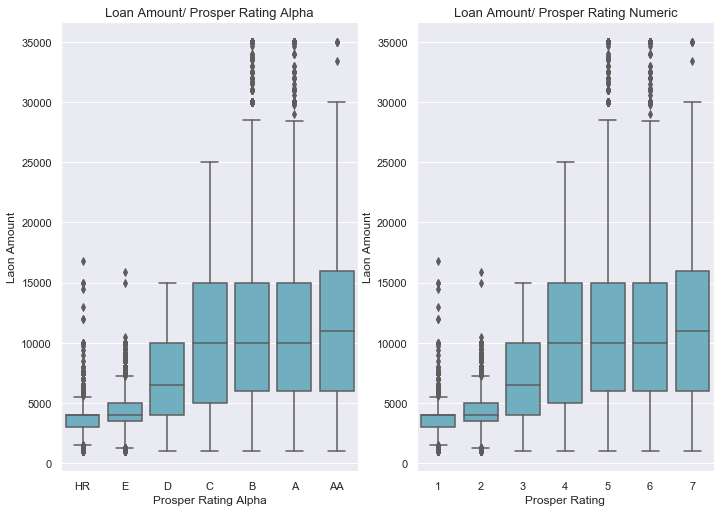

In [50]:
#box plots for the loan amount and Prosper score both alpha and numeric 
plt.figure(figsize = (11.69, 8.27)) 
color= sn.color_palette()[9]
plt.subplot(121)
sn.boxplot(data = df_loan_clean, x= 'ProsperRating (Alpha)', y= 'LoanOriginalAmount', color= color)
plt.title('Loan Amount/ Prosper Rating Alpha', fontsize=13)
plt.xlabel('Prosper Rating Alpha')
plt.ylabel('Laon Amount')

plt.subplot(122)
sn.boxplot(data = df_loan_clean, x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', color= color)
plt.title('Loan Amount/ Prosper Rating Numeric', fontsize=13)
plt.xlabel('Prosper Rating')
plt.ylabel('Laon Amount');

## Borrower's Rate and APR vs. Loan Amount
The density of the points on the scatter plots show that the loan amount and borrower rate as well as the APR are moderately negatively correlated, which means that the more the loan amount, the lower the interest rate and the APR. But since most of the loans are concentrated between 4000 and 15000 dollars and that there is mixed rates and APRs for this range, the correlation is moderate and not strong.

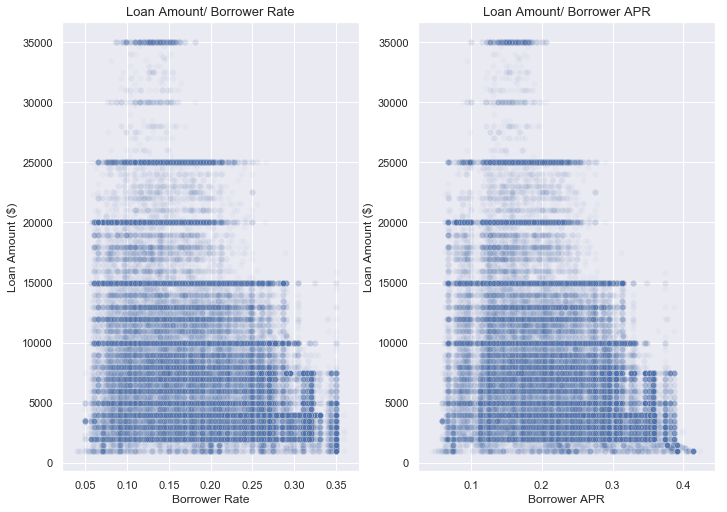

In [51]:
#ploting borrower rate and borrower apr in relation to loan amount

plt.figure(figsize=(11.69, 8.27))

plt.subplot(121)
sn.scatterplot(data= df_loan_clean, x='BorrowerRate', y= 'LoanOriginalAmount', alpha = 0.04)
plt.title('Loan Amount/ Borrower Rate', fontsize= 13)
plt.xlabel('Borrower Rate')
plt.ylabel('Loan Amount ($)');

plt.subplot(122)
sn.scatterplot(data= df_loan_clean, x='BorrowerAPR', y= 'LoanOriginalAmount', alpha =  0.04)
plt.title('Loan Amount/ Borrower APR', fontsize= 13)
plt.xlabel('Borrower APR')
plt.ylabel('Loan Amount ($)');

The density of the points on the scatter plots show that the loan amount and borrower rate as well as the APR are moderately negatively correlated, which means that the more the loan amount, the lower the interest rate and the APR. But since most of the loans are concentrated between 4000 and 15000 dollars and that there is mixed rates and APRs for this range, the correlation is moderate and not strong.

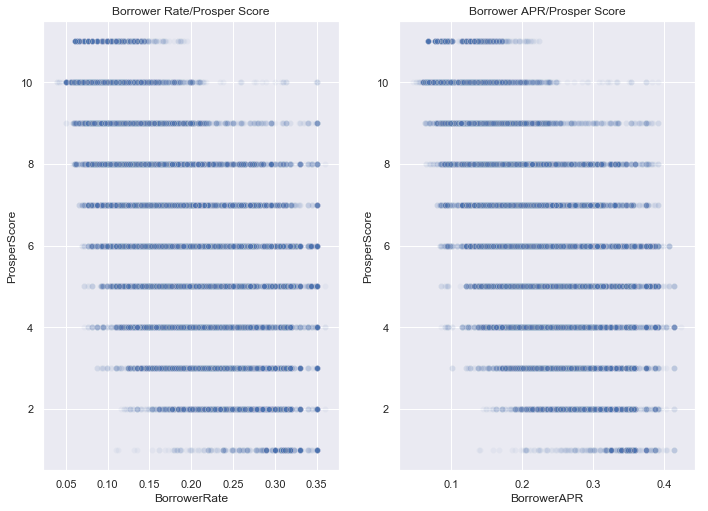

In [52]:
#ploting borrower rate and borrower apr in relation to Prosper numeric score 

plt.figure(figsize=(11.69, 8.27))

plt.subplot(121)
sn.scatterplot(data= df_loan_clean, x='BorrowerRate', y= 'ProsperScore', alpha = 0.05)
plt.title('Borrower Rate/Prosper Score')

plt.subplot(122)
sn.scatterplot(data= df_loan_clean, x='BorrowerAPR', y= 'ProsperScore', alpha =  0.05)
plt.title('Borrower APR/Prosper Score');

The borrower's rate is mostly determined by the Prosper Rating; the lower the Prosper rating, the higher the borrower's interest rate and vice versa.

## Loan Amount Based on Income Range
There is a positive relationship between the income range and the loan amount, i.e. the larger the income, the greater the loan amount amount.

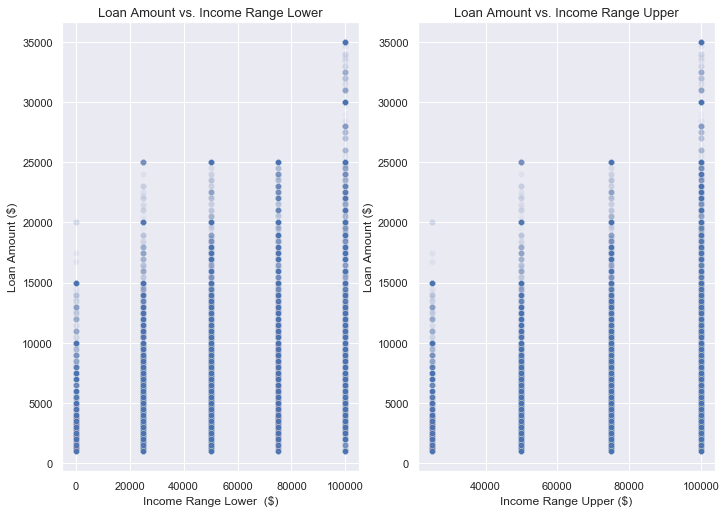

In [53]:
# ploting income range vs. loan amount
plt.figure(figsize=(11.69, 8.27))

plt.subplot(121)
sn.scatterplot(data= df_loan_clean, x='IncomeRangeLower', y= 'LoanOriginalAmount', alpha = 0.04)
plt.title('Loan Amount vs. Income Range Lower', fontsize=13)
plt.xlabel('Income Range Lower  ($)')
plt.ylabel('Loan Amount ($)');

plt.subplot(122)
sn.scatterplot(data= df_loan_clean, x='IncomeRangeUpper', y= 'LoanOriginalAmount', alpha =  0.04)
plt.title('Loan Amount vs. Income Range Upper', fontsize=13)
plt.xlabel('Income Range Upper ($)')
plt.ylabel('Loan Amount ($)');

 The scatter plot above shows that there is a positive relationship between the income range and the loan amount, i.e. the larger the income, the greater the loan amount amount.  

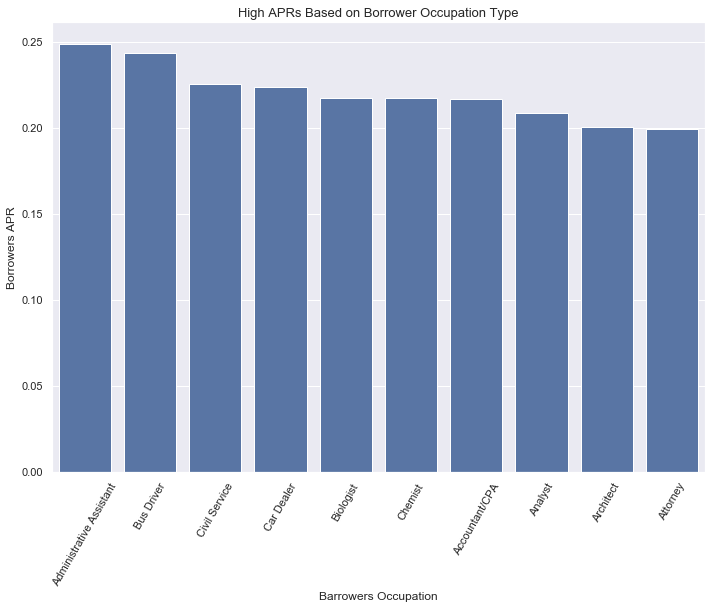

In [54]:
# borrower's APR through borrower's occupation
occupation_apr = df_loan_clean.groupby('Occupation')['BorrowerAPR'].mean()

#ploting borrowers APR means for the top 10 occupations
occupation_apr = occupation_apr[9::-1]
plt.figure(figsize=[11.69, 8.27])
sn.barplot(occupation_apr.index, occupation_apr.values, color = sn.color_palette()[0], 
           order= occupation_apr.sort_values(ascending=False).index)
plt.title('High APRs Based on Borrower Occupation Type', fontsize=13)
plt.xlabel('Barrowers Occupation')
plt.ylabel('Borrowers APR')
plt.xticks(rotation= 60);

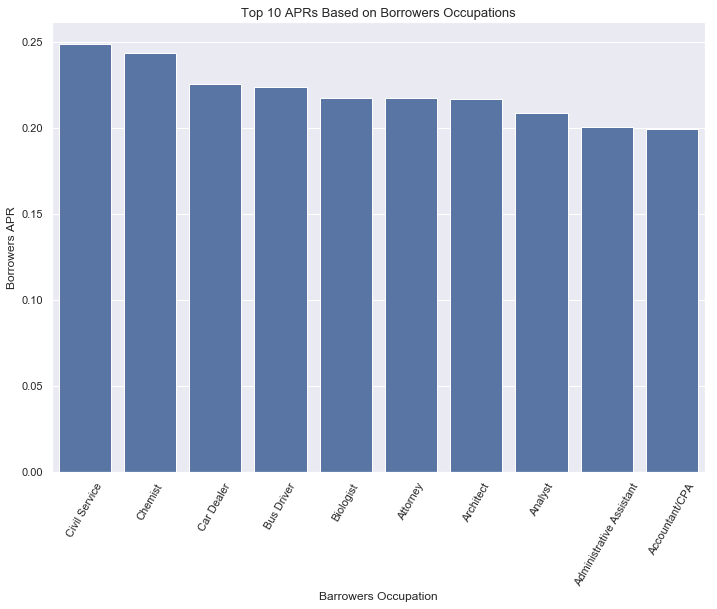

In [55]:
plt.figure(figsize=[11.69, 8.27])
sn.barplot(occupation_apr.index, occupation_apr.nlargest(10), color = sn.color_palette()[0])
plt.title('Top 10 APRs Based on Borrowers Occupations', fontsize=13)
plt.xlabel('Barrowers Occupation')
plt.ylabel('Borrowers APR')
plt.xticks(rotation= 60);

Though some of the borrowers' occupations received higher APR vs. others, for example student and college sophomore (alomost 30%), but overall it seems that borrower's occupation has little influence on borrower's APR compared to other factors in the dataset.

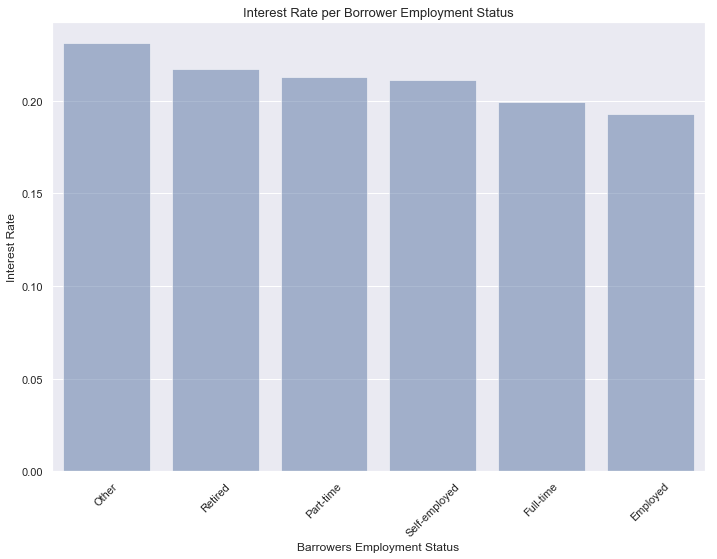

In [56]:
#borrowers APR means for the 10 occupations
emp_status = df_loan_clean.groupby('EmploymentStatus')['BorrowerRate'].mean()
emp_status = emp_status[9::-1]
plt.figure(figsize=(11.69, 8.27))
sn.barplot(emp_status.index, emp_status.values, color= sn.color_palette()[0], 
           order= emp_status.sort_values(ascending=False).index, alpha=0.5)
plt.title('Interest Rate per Borrower Employment Status', fontsize=13)
plt.xlabel('Barrowers Employment Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation= 45);

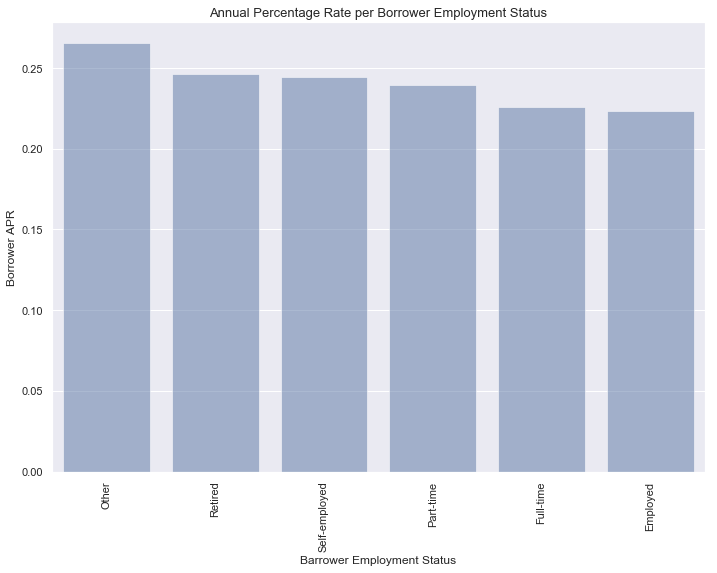

In [57]:
#ploting borrower APR through employment status
empstat_apr = df_loan_clean.groupby('EmploymentStatus')['BorrowerAPR'].mean()
empstat_apr = empstat_apr[9::-1]
plt.figure(figsize=(11.69, 8.27))
sn.barplot(empstat_apr.index, empstat_apr.values, order= empstat_apr.sort_values(ascending=False).index,
           color= sn.color_palette()[0], alpha=0.5)
plt.title('Annual Percentage Rate per Borrower Employment Status', fontsize=13)
plt.xlabel('Barrower Employment Status', fontsize=12)
plt.ylabel('Borrower APR', fontsize=12)
plt.xticks(rotation= 90);

It looks like the employment status also has an important role in determining the interest rate and APR. Most of the borrowers in the dataset are employed, full time employed and other. The borrowers who are under retired, part-time employed or self-employed are very fewe in number (561 total) and received higher rate and APR. There is only one borrower under unemployed, and received the lowest Prosper rating and the highest interest rate and APR.

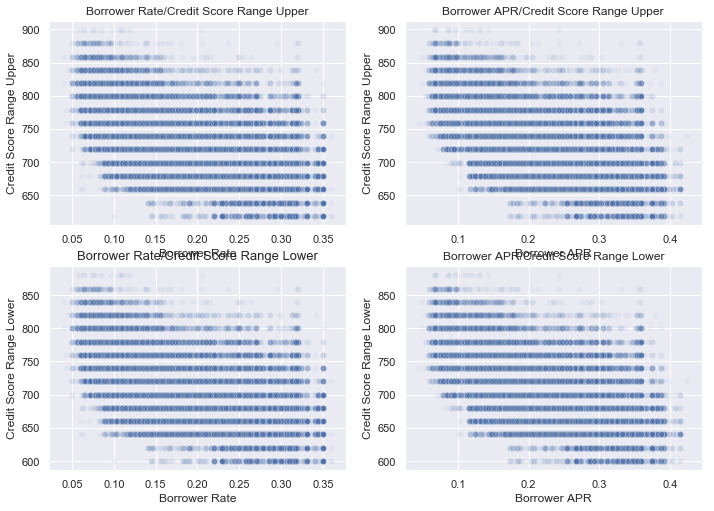

In [58]:
plt.figure(figsize=(11.69, 8.27))

plt.subplot(221)
sn.scatterplot(data= df_loan_clean, x='BorrowerRate', y= 'CreditScoreRangeUpper', alpha =  0.05)
plt.title('Borrower Rate/Credit Score Range Upper')
plt.xlabel('Borrower Rate')
plt.ylabel('Credit Score Range Upper')

plt.subplot(222)
sn.scatterplot(data= df_loan_clean, x='BorrowerAPR', y= 'CreditScoreRangeUpper', alpha =  0.05)
plt.title('Borrower APR/Credit Score Range Upper')
plt.xlabel('Borrower APR')
plt.ylabel('Credit Score Range Upper')

plt.subplot(223)
sn.scatterplot(data = df_loan_clean, x = 'BorrowerRate', y = 'CreditScoreRangeLower', alpha = 0.05)
plt.title('Borrower Rate/Credit Score Range Lower', fontsize= 13)
plt.xlabel('Borrower Rate')
plt.ylabel('Credit Score Range Lower')

plt.subplot(224)
sn.scatterplot(data = df_loan_clean, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', alpha = 0.05)
plt.title('Borrower APR/Credit Score Range Lower')
plt.xlabel('Borrower APR')
plt.ylabel('Credit Score Range Lower');

The credit range is also a very significant factor in determaining the borrowers trustworthyness and in influencing the APR as well as the interest rate. The higher the credit range, the lower the APR/ir and vice versa.

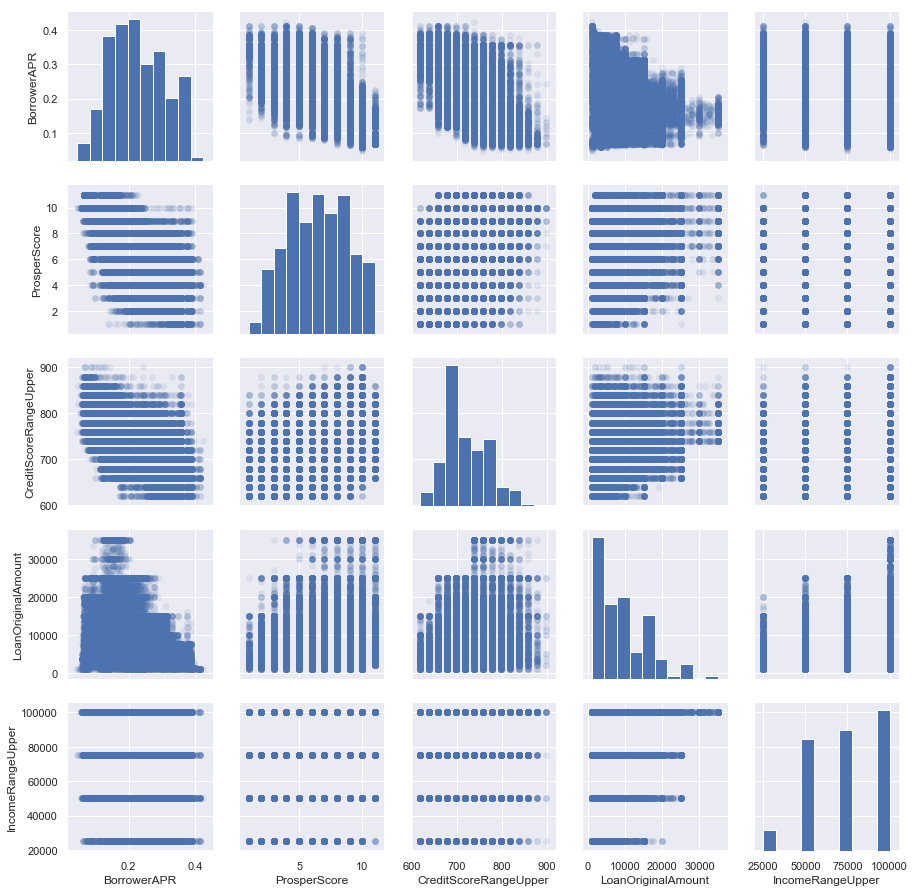

In [59]:
#pair plot for data variables to see pairwise relationships in the loan data variables
#sn.set(style="ticks", color_codes=True)
pair_rate = ['BorrowerAPR','ProsperScore','CreditScoreRangeUpper','LoanOriginalAmount',
             'IncomeRangeUpper']
g= sn.pairplot(df_loan_clean[pair_rate], kind='scatter', plot_kws={'alpha':0.05});
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.05);

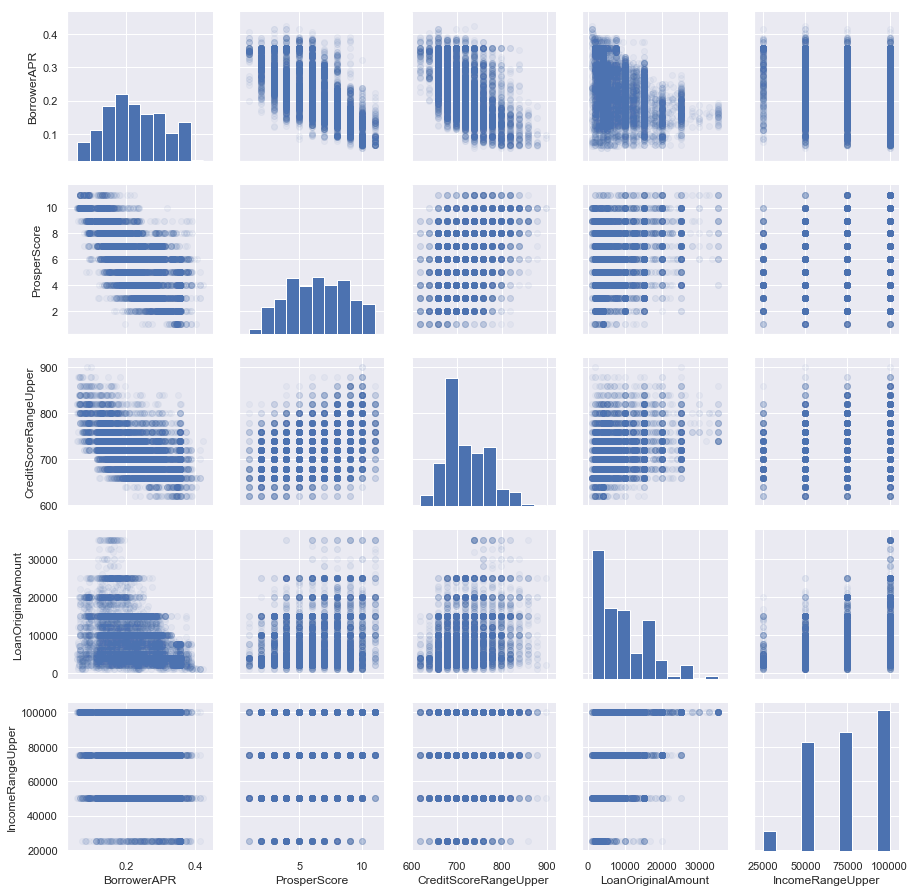

In [60]:
# ploting 8000 loan sample to see that the reletionship is still the same
loan_samps = df_loan_clean.sample(8000)
g = sn.PairGrid(data = loan_samps, vars= pair_rate)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.05);

All the pair plot above both for the loan variables and the data samples show the same paterns, i.e. the relationship between variables doesn't change.

## Correlation coeffecient between Data Features to see what type of correlation exists
The heatmap plot bellow shows the correlation among all the numeric variables of our interest  and the color line to the right of the plot/map shows what kind of relationship is there between each pair of the variables. The positive and negative number encoding as well as the color encoding on the map specify whether there is a positive or negative, strong or weak correlation between variables such that the positive number indicates positive relationship and the negative number indicates a negative relationship. Similarly, more hotter the color the stronger the negative correlation and the cooler the color the stronger the positive relationship.

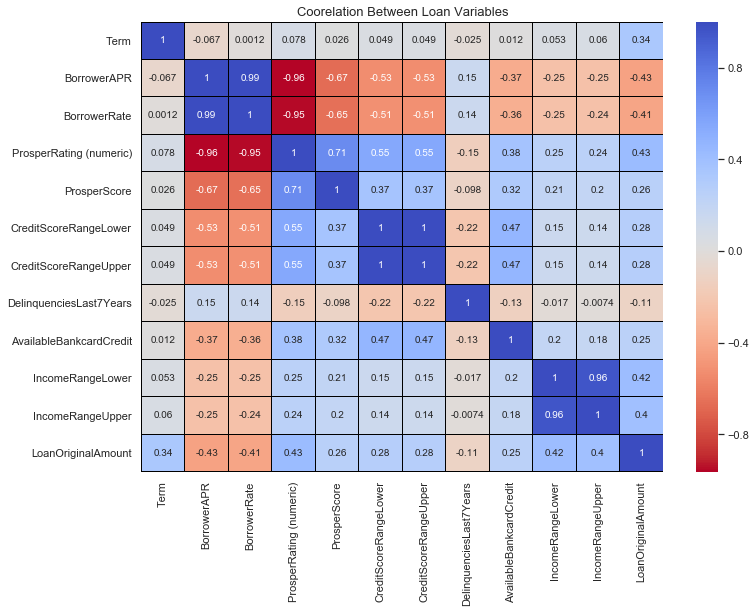

In [61]:
# heatmap for correlation between all variables of our interest 
loan_vars = ['Term', 'BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ProsperScore', 'CreditScoreRangeLower', 
             'CreditScoreRangeUpper','DelinquenciesLast7Years', 'AvailableBankcardCredit', 'IncomeRangeLower', 
             'IncomeRangeUpper', 'LoanOriginalAmount']
plt.figure(figsize=(11.69, 8.27))
sn.heatmap(df_loan_clean[loan_vars].corr(), annot = True, fmt='.2g', cmap = 'coolwarm_r', linewidths=0.1, linecolor='black')
plt.title('Coorelation Between Loan Variables', fontsize= 13);

The heatmap plot above shows the correlation among all the numeric variables of our interest  and the color line to the right of the plot/map shows what kind of relationship is there between each pair of the variables. The positive and negative number encoding as well as the color encoding on the map specify whether there is a positive or negative, strong or weak correlation between variables such that the positive number indicates positive relationship and the negative number indicates a negative relationship. Similarly, more hotter the color the stronger the negative correlation and the cooler the color the stronger the positive relationship.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The correlations between the variable pairs of my interest is as below:
- There is weak negative correlation between loan terms and the APR but there is almost no correlation with the borrower rate.
- There is weak positive correlation between loan term and Prosper rating and Prosper score.
- The relationship between loan term and the credit score is a weak positive one.
- There is almost no correlation between loan term and the number of delinquencies.
- There is almost no correlation between loan term and available bankcard credit.
- The correlation between loan term and the income range is weak positive.
- The correlation between loan term and the loan amount is a moderate positive correlation, i.e. the loan amount is higher when the loan term is higher and vice versa.
- The correlation between Prosper rating and the borrower APR/ borrower rate is a very strong negative relationship which means the highest the prosper rating, the lowest the APR/ interest rate and the lower the Prosper rating the highest APR/ borrower rate.
- There is a moderate negative correlation between Prosper score and the borrower's APR/ borrower rate.
- There is a moderate negative relationship between the credit score and the APR as well as the interest rate.
- There is a weak negative relationship between the APR + the borrower rate and the number of delinquencies.
- There is a moderate relationship between available bank card credit and the APR/ borrower rate.
- The correlation between APR/ borrower rate and the borrower's income is a weak one.
- There is a moderate correlation between APR/ borrower rate and the loan amount.
- The correlation between Prosper rating and the prosper score is a positive strong relationship.
- The correlation between Prosper rating and the credit score range is moderate positive relationship
- The correlation between Prosper rating and number of delinquencies is a weak negative one.
- There is a moderate positive relationship between Prosper rating and available bankcard credit.
- There is a weak positive relationship between Prosper rating and the income range, i.e. the higher the income range the higher the rating.
- The correlation between Prosper rating and the loan amount is a moderate positive relationship.
- The correlation between Prosper score and the credit score range is a moderate positive correlation.
- The relationship between Prosper score and the number of delinquencies is a weak negative relationship.
- The correlation between Prosper score and available credit via bank card is a moderate positive one.
- The correlation between Prosper score and the income range is a weak positive one.
- There is also a weak positive relationship between Prosper score and the loan amount.
- The correlation between credit score range and number of delinquencies is negative weak relationship
- There is a moderate positive correlation between credit score range and available bankcard credit.
- The correlation between credit score range and the income range is a weak positive one.
- There is a weak positive correlation between credit range and the loan amount.
- There is a weak negative relationship between number of delinquencies and available bank credit.
- There is almost no correlation between delinquencies and the income range as well as the loan amount.
- The correlation between available bankcard credit and the income range as well as the loan amount is a weak positive correlation.
- There is a moderate positive relationship between the income range and the loan amount which means that the higher the income, the larger the loan amount.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Though I was mainly looking for correlation between the APR, the borrower rate (i) and the loan amount and other data variable and found some strong correlation as expected, but in the meanwhile some interesting relationship was also found. For example, the correlation between Prosper score and the influence of it on the three major features of my interest was not a strong negative correlation as it's in the case of Prosper rating. Actually, I don't understand what is the difference between Prosper rating and the Prosper score and which one is the right variable to analyze at the first place.

### Multivariate Exploration

In this section, I'll further explore some of the variables of interest to see their impact on APR and the loan amount.

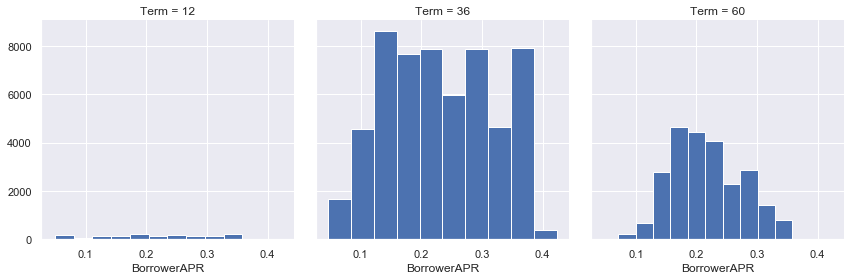

In [62]:
#Ploting the distribution of APR over the loan terms
g = sn.FacetGrid(df_loan_clean, col='Term', height = 4)
g.map(plt.hist, 'BorrowerAPR');

As per the distribution plots above, the Borrower APR in correlation with loan terms is moderate since it's differently modaled for each loan term. There is not much data when the loan term is 12, APR is somehow multimodal when it's 36 months it's almost right skewed when the loan term is 60 month. The histogram proves that loan term has some influence influence on borrower's APR but it is not so much sinificant. 

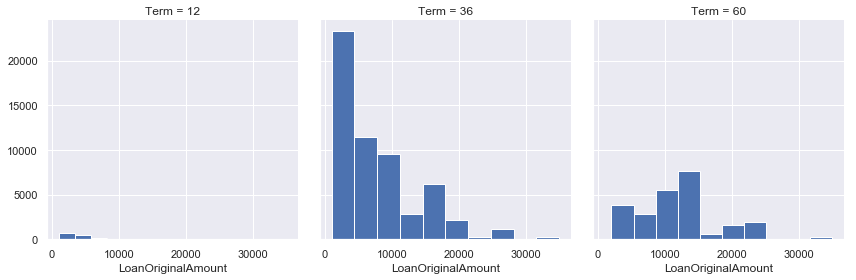

In [63]:
#Ploting the distribution of loan amount over the loan terms
g = sn.FacetGrid(df_loan_clean, col='Term', height= 4)
g.map(plt.hist, 'LoanOriginalAmount');

The distribution of loan amount in correlation to loan terms apears to be multimodal and the relationship between loan term and the loan amount is not strong. It's right skewed when the loan term is 36 months, where most of the data fall but the loan amount didn't increase with the increase of the loan term when the term goes up to 60 months. 

## APR and Loan Amount in Relation to Prosper rating

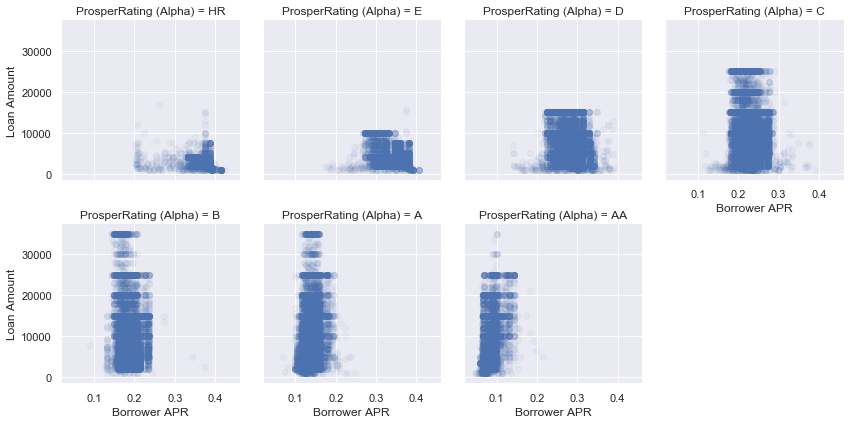

In [64]:
#ploting APR and loan amount in relation to Prosper rating
g = sn.FacetGrid(data = df_loan_clean, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha = 0.05)
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount');

The facet grid above shows that APR and loan amount have positive strong correlation to Prosper rating, i.e. there is lower APR and greater amount with better Prosper rating. For the highest rating AA, there is the lowest APR and greater amount and for the lowest rating HH, there is highest APR and smaller amount. There is an interesting twest when Prosper rating is above B in terms of loan amount, such that the loan amount is smaller for rating A and even more samller when it's AA. This might be due to the Prosper risk mitication measures for generally limiting the loan amount to some extents. 

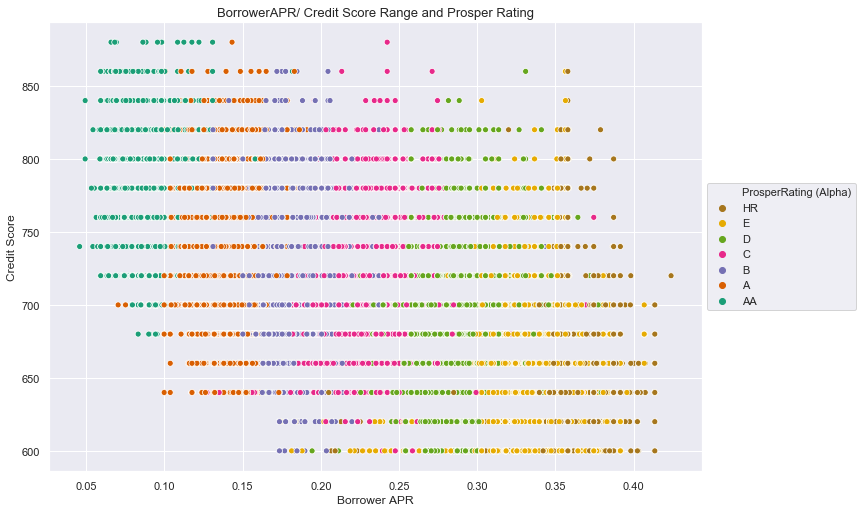

In [65]:
#ploting borrower rate and apr through credit score range by prosper score

plt.figure(figsize = [11.69, 8.27])

sn.scatterplot(data= df_loan_clean, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', hue= 'ProsperRating (Alpha)', 
               palette='Dark2_r')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('BorrowerAPR/ Credit Score Range and Prosper Rating', fontsize=13)
plt.xlabel('Borrower APR')
plt.ylabel('Credit Score');

There is weak negative relationship between credit score range and the APR. This correlation in respect to Prosper rating is still a weak negative one.

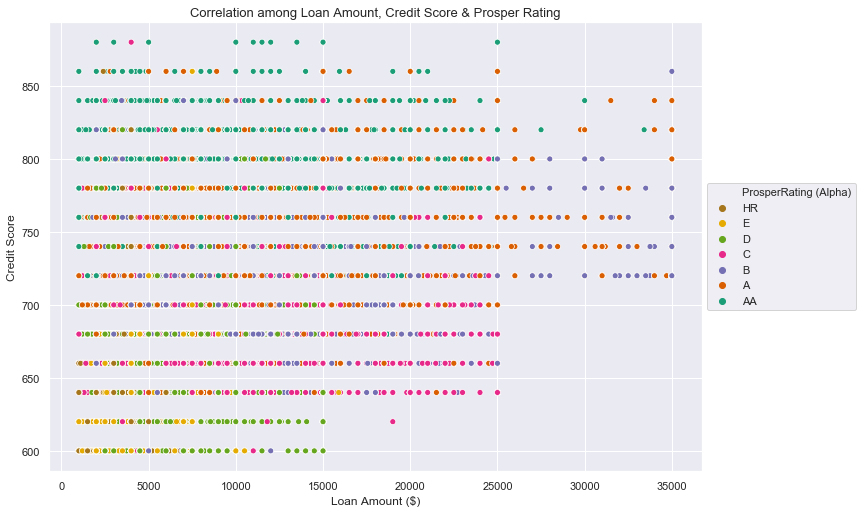

In [66]:
plt.figure(figsize = [11.69, 8.27])

sn.scatterplot(data= df_loan_clean, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', hue= 'ProsperRating (Alpha)', 
               palette='Dark2_r')
plt.title('Correlation among Loan Amount, Credit Score & Prosper Rating', fontsize=13)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Credit Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The correlation between the credit score and loan amount in respect to prosper rating is a weak negative relationship.

As per all the explorations from univariate to multivriate, it has been discovered that the most influencial (negatively) on the APR and Borrower's Rate are Prosper Rating, Prosper Score, Credit Score, Loan Amount, and Available Bankcard Credit respectively. It has also been discovered that Posatively most affecting features on Loan Amounts are the Income range and Loan Term and negativly most affectings features are the APR and the Interest Rate. 
